# Exercise 4
## Data Generation with QDA
We start in the setting of exercise 2, i.e. with the digits data set and the function fit_qda(). This time we choose the classes "3" and "5". We use a slightly adapted version of fit_qda() so that it accepts two arbitrary labels and not only 0 and 1

In [68]:
#import libraries used for the exercises
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.stats import multivariate_normal

digits = load_digits()

print(digits.keys())

data         = digits["data"]
images       = digits["images"]
target       = digits["target"]
target_names = digits["target_names"]

#apply a filter such that only "3" and "2" are left
cond = np.logical_or(target==2, target==3)

data_filtered         = data[cond]
images_filtered       = images[cond]
target_filtered       = target[cond]
target_names_filtered = np.array([2,3])

def fit_qda(training_features, training_labels):
    #identify labels
    labels = np.unique(training_labels)
    assert (len(labels)==2), "the number of labels must be exactly 2"
    
    #compute the priors p
    p0 = len(training_labels[training_labels==labels[0]])/len(training_labels)
    p = np.stack((p0, 1-p0))
    
    #compute mu
    features0 = training_features[training_labels==labels[0]]
    features1 = training_features[training_labels==labels[1]]
    mu = np.stack((np.mean(features0, axis=0), np.mean(features1, axis=0)))
    
    #compute the covariance matrix
    covmat0 = np.cov(features0.transpose())
    covmat1 = np.cov(features1.transpose())
    covmat = np.stack((covmat0, covmat1))
    
    return [mu, covmat, p]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [69]:
#estimate the mean and covariance matrix for both classes
mu, covmat, p = fit_qda(data_filtered, target_filtered)

#create 8 images for both classes
imgs2 = np.random.multivariate_normal(mu[0], covmat[0], 8) #2
imgs3 = np.random.multivariate_normal(mu[1], covmat[1], 8) #3

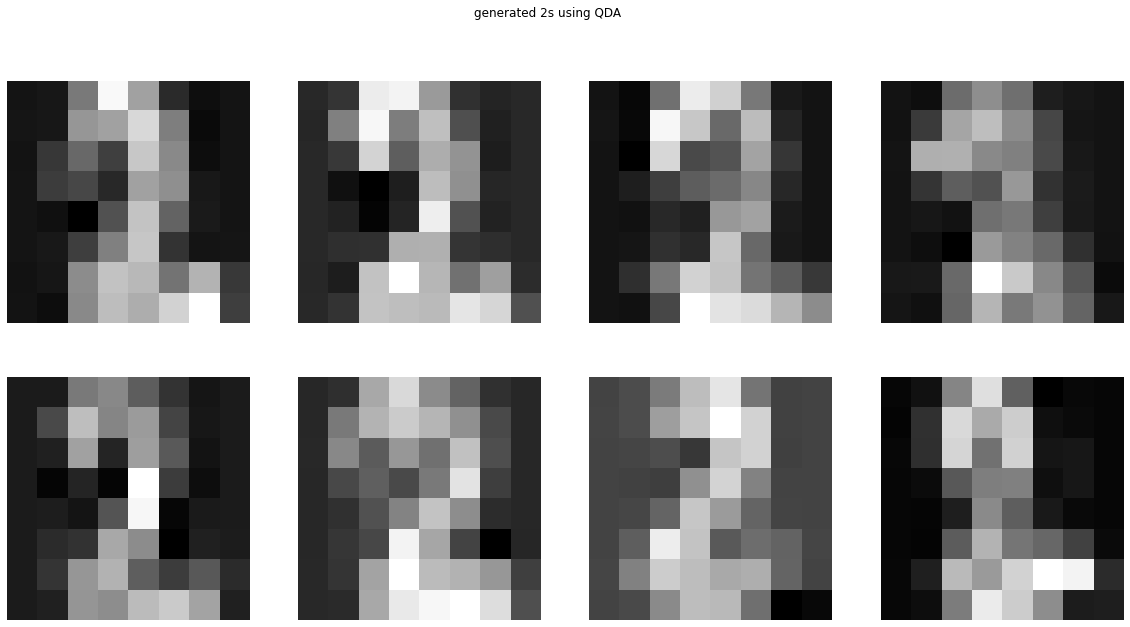

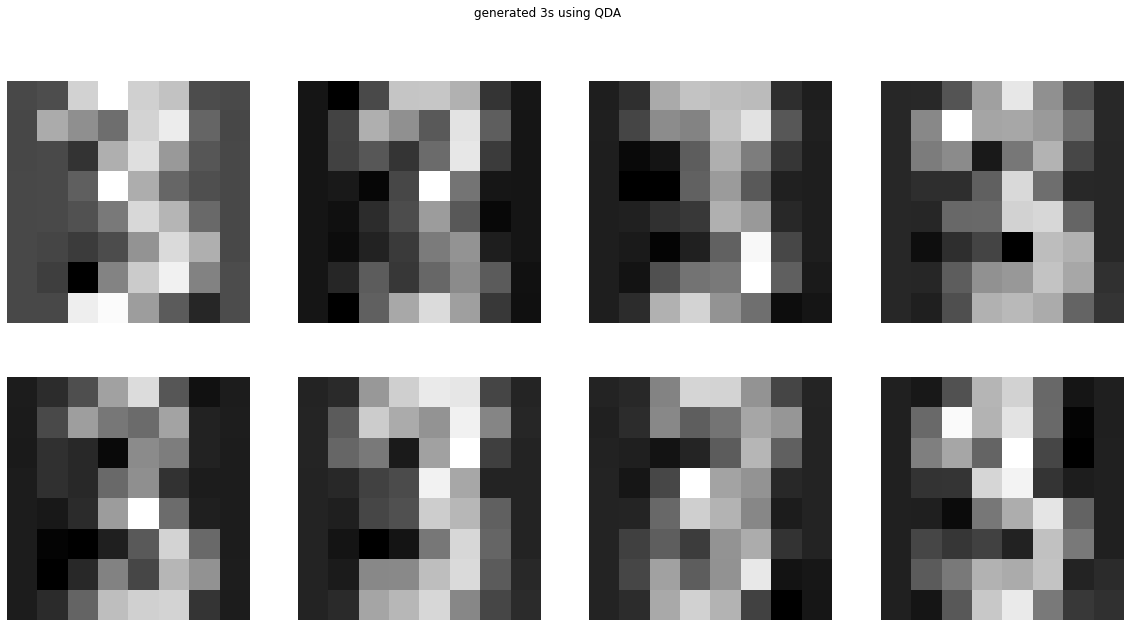

In [72]:
#show images
imgs2 = np.reshape(imgs2, (8,8,8))
imgs3 = np.reshape(imgs3, (8,8,8))

fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle("generated 2s using QDA")
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(imgs2[4*i+j], cmap="gray")
        axes[i,j].axis("off")

fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle("generated 3s using QDA")
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(imgs3[4*i+j], cmap="gray")
        axes[i,j].axis("off")

With a little fantasy one can recognize the shape of our digits in the images above. Using bicubic interpolation between the points on the mesh leads to images that show the digits more clearly.

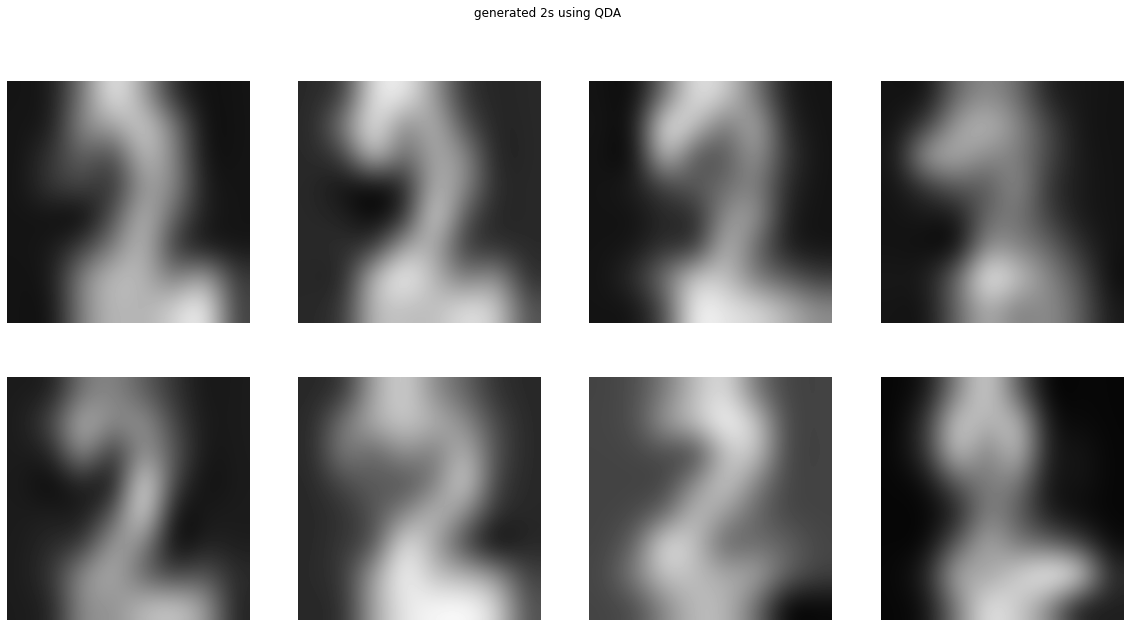

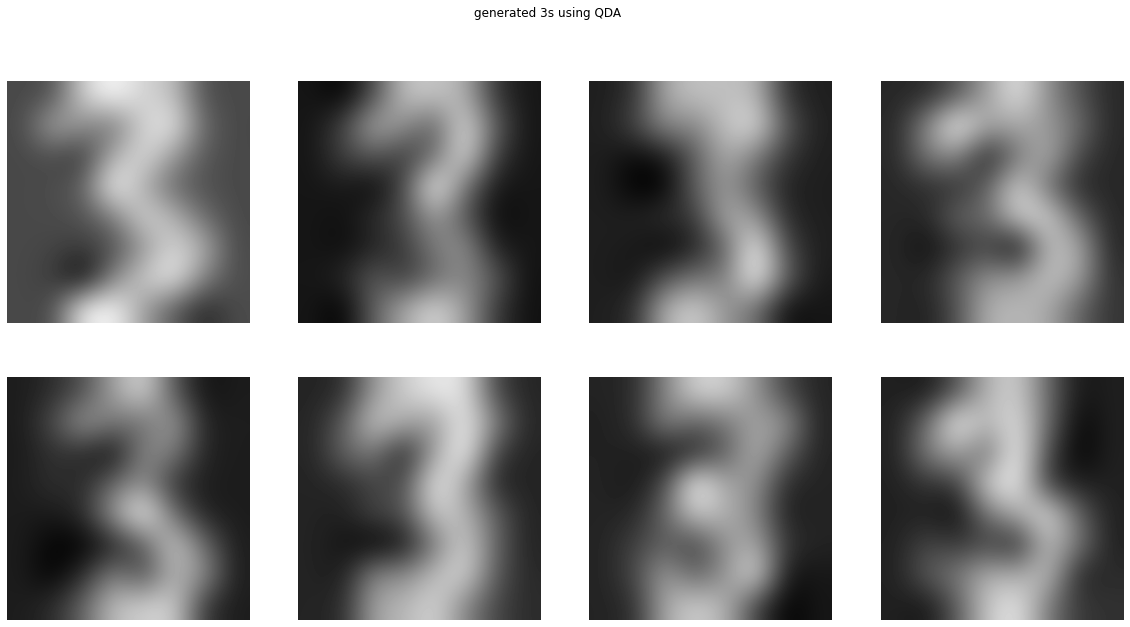

In [90]:
#show images
imgs2 = np.reshape(imgs2, (8,8,8))
imgs3 = np.reshape(imgs3, (8,8,8))

fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle("generated 2s using QDA")
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(imgs2[4*i+j], cmap="gray", interpolation="bicubic")
        axes[i,j].axis("off")

fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle("generated 3s using QDA")
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(imgs3[4*i+j], cmap="gray", interpolation="bicubic")
        axes[i,j].axis("off")

The program uses the mean of all instances of one class to generate new instances of this class. This can lead to problems if the mean is not a good guess for a single instance of a certain class. This is the case if the distribution consists of two separated maxima of the same height with only little overlap of the two peaks. The mean will be located in the middle of the two maxima, where in fact no real instances are located. An simple example for such a distribution is given by a dataset of 3s where half of the digits are located on the left side of the image while the other half is on the right side.